In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [6]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
#correlation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


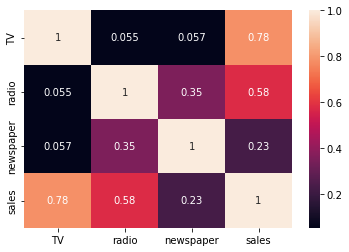

In [8]:
#create new independent variable(feature)
sns.heatmap(df.corr(),annot=True) #annot=True yüzdeleri grafikte görmemizi sağlar)
plt.show()

In [9]:
#lineer reg
#y=bağımlı parameter(değişken) sales
#bağımsız parameter(değişken) 3 tv-nespaper-radio
#b0=otonom parametre(başlangıç) sabit sayıdır
#y=b1*x+b0=>Linear regression
#b katsayılarını dataframeden hesaplıyoruz,sonra xlerimizi sırayla işletiyoruz.
#simple linear reg yaptığımızdan tek x değeri ile çalışıyoruz. multi yapsaydık 3 x değeri de hesaba girerdi.



In [10]:
df["total_spend"]=df.TV+df.radio+df.newspaper
df 

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [11]:
!pip install scipy

In [12]:
import scipy.stats as stats

In [13]:
#neden toplam sütunu yaptık da diğer columnlardan birini seçmedik lineer modelimiz için ona karar vermek için
def check_dist(df,var): #df=dataframe,var=variable,kolonları tek tek alacak.
    plt.subplot(1,2,1) #birinci satır ikinci sütun birincisi,yani:                               
    sns.histplot(x=var,data=df,kde=True)  #2 grafik yanyana çiz,ilk grafik buraya çizilecek komutu verdik
    plt.subplot(1,2,2)
    stats.probplot(df[var],dist="norm",plot=plt) #proplot probability plot demek. Datayı tahmin etmeye çalış,ne oranda tahmin ettiğini görselleştir.
    plt.show()

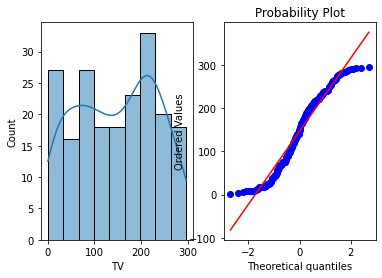

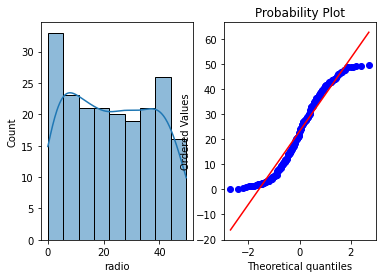

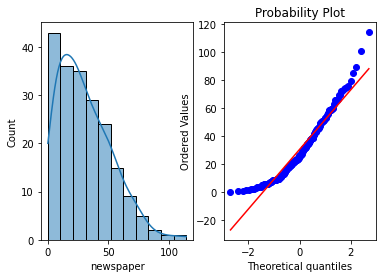

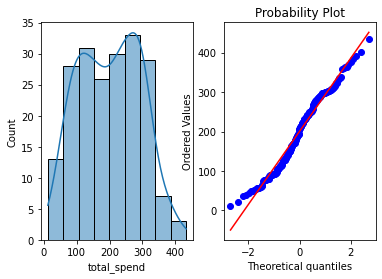

In [14]:
for col in df.drop("sales",axis=1).columns:
    check_dist(df,col)

In [15]:
#tahminini data dağılımına baktık,-2,2 arasına sıkıştırdı datayı,standardize etti datayı mavi noktalar halinde. Sonra da
#lineer çizgisini çekti.Baktığımızda en uygun kırmızı çizgiyi görüp onunla devam etme kararı aldık. Tüm bağımsız değişkenler
#arasında en uygun seçim,n total spend olduğunu gördük.Probplot buna yarıyor. prob plotta altta olan xin işlenmiş hali,tahmin değeri,
#dikey düzlem ise gerçek değeri veriyor. Böylece tahmin edilen ve gerçek değer arasında ne kadar error var buluruz.
#En az erroru arıyoruz. residual errors=|y-y_prediction değeri|

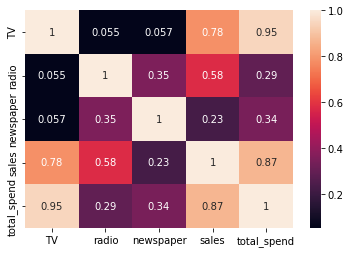

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show() #burda da corr 0.87 total spentin

In [17]:
df.corr()#bu da üstteki grafiğin rakamsal hali.

,TV,radio,newspaper,sales,total_spend
TV,1.000000,0.054809,0.056648,0.782224,0.945330
radio,0.054809,1.000000,0.354104,0.576223,0.293211
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
sales,0.782224,0.576223,0.228299,1.000000,0.867712
total_spend,0.945330,0.293211,0.343059,0.867712,1.000000


In [18]:
df=df[["total_spend","sales"]]
df

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


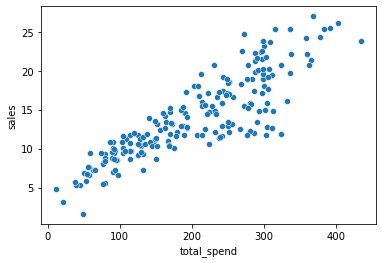

In [19]:
sns.scatterplot(x="total_spend",y="sales",data=df)
plt.show()

# correlation between dependent and independent variables

In [20]:
corr=df.sales.corr(df.total_spend)
corr

0.8677123027017427

coefficient of determination (R2)

In [21]:
R2_score=corr**2
R2_score #modelimiz yüzde 75 doğru çalışır demiş olduk.

0.7529246402599608

In [23]:
sns.regplot(y="sales",data=df)
plt.show() #çizginin etrafındaki sis efekti +/- standart sapmayı veriyor.

TypeError: object of type 'NoneType' has no len()

# Splitting the dataset into X(independent variables) and Y(dependent variables)

In [24]:
#y=b1*x+b0
#y=bağımlı değişken/target,dependent value
#b1=katsayı,coefficient/eğim,slope -1<b1<1
#x=bağımlı değişken/feature,independent value
#b0=otonom parametre,başlangıç parametresi,intercept,eksi-artı sonsuz arası herhangi bir değer olabilir

In [25]:
X=df.total_spend
y=df.sales

In [26]:
##determination of coefficient slopes and intercept

In [27]:
np.polyfit(X,y,deg=1) #simple lineer reg=1 defree,deg=1). b1,b0i hesaplayan komutu da öğrenmiş olduk

array([0.04868788, 4.24302822])

In [28]:
print("b1 = {}\nb0 = {}".format(np.polyfit(X,y, deg = 1)[0],np.polyfit(X, y, deg = 1)[1]))

b1 = 0.048687879319048145
b0 = 4.2430282160363255


# y_predict = 0.049 * x + 4.24
# y = 0.049 * x + 4.24 + €    # = hata parametreleri toplamı / residual errors



In [29]:
b1=np.polyfit(X,y,deg=1)[0]
b0=np.polyfit(X,y,deg=1)[1]
b1
b0

4.2430282160363255

In [30]:
y_predict=b1*X+b0
y_predict

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64

In [31]:
values = {"actual": y, "predicted": y_predict, "resudial" : y - y_predict, "LSE": (y - y_predict) **2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,resudial,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [32]:
#lse neden kullanıyoruz çünkü en küçük hatayı bile çok abartılı rakam olarak veriyor.lse karelerin bilmemnesiymiş. Hata tespiti
#için bunu takıntılı olarak kullanıyoruz

In [33]:
df_2.resudial.sum() #y = 0.049 * x + 4.24 + € # = hata parametreleri toplamı / residual errors. Yanıltıcı,değerler küçük çıkıyor
#bu her hesapta farklı çıkar,-13 dediği 0dan sonra 13 basamak demek.Şaşırma.Reidual her zaman sum 0 olur,lse sum hep aynı olur.

8.810729923425242e-13

In [34]:
df_2.resudial.sum().round()


0.0

In [35]:
df_2.LSE.sum()#bu en doğru hata payını veriyor.modelde epey hata çıktı. yani r2 75 yetersizmiş.Biz o yüzden 90 hatta 98 üstü istiyoruz MLde

1338.4439761715594

In [36]:
#lse=ekk=en küçük kareler yöntemi

# Prediction with simple lineer regression

In [37]:
potential_spend=np.linspace(0,500,100)

In [38]:
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [39]:
predicted_sales_lin=b1*potential_spend+b0 #yukarıda hereg modelini yeni oluşturduğumuz tabloda kullanıyoruz

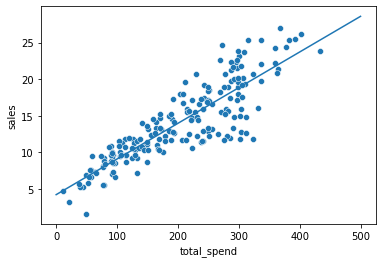

In [40]:
predicted_sales_lin = b1 * potential_spend + b0 
predicted_sales_lin 

plt.plot(potential_spend, predicted_sales_lin)
sns.scatterplot(x = "total_spend", y = "sales", data = df)#tahminimiz orjinal veriye uydu mu ona bakıyoruz
plt.show()

# improving predictions

In [41]:
#düz çizgiyi biraz kırıklı hale getirip daha çok doğruyu kapsatmaya çalışıyoruz. Bu daha iyi tahmin yapıyoruz anlamına gelmiyor!!!

In [42]:
a= np.polyfit(X, y, deg = 3)

a1 = np.polyfit(X, y, deg = 3)[0]
a2 = np.polyfit(X, y, deg = 3)[1]
a3 = np.polyfit(X, y, deg = 3)[2]
a0 = np.polyfit(X, y, deg = 3)[3]

In [43]:
predicted_sales_poly = a1 * potential_spend ** 3 + a2 * potential_spend ** 2 + a3 * potential_spend + a0
predicted_sales_poly

array([ 2.70495053,  3.11474825,  3.51512185,  3.90630911,  4.28854779,
        4.66207567,  5.02713052,  5.38395012,  5.73277224,  6.07383465,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107317,
        7.97057058,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998502,
        9.3813837 ,  9.64787595,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506287, 11.15710981, 11.39591473, 11.63171541,
       11.86474962, 12.09525514, 12.32346974, 12.5496312 , 12.77397728,
       12.99674577, 13.21817442, 13.43850103, 13.65796336, 13.87679918,
       14.09524627, 14.3135424 , 14.53192534, 14.75063288, 14.96990277,
       15.1899728 , 15.41108073, 15.63346435, 15.85736142, 16.08300973,
       16.31064703, 16.54051111, 16.77283973, 17.00787068, 17.24584172,
       17.48699063, 17.73155518, 17.97977315, 18.23188231, 18.48812043,
       18.74872528, 19.01393464, 19.28398629, 19.55911799, 19.83956752,
       20.12557265, 20.41737116, 20.71520081, 21.01929939, 21.32

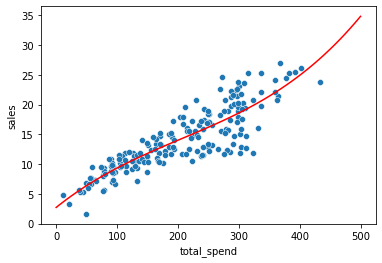

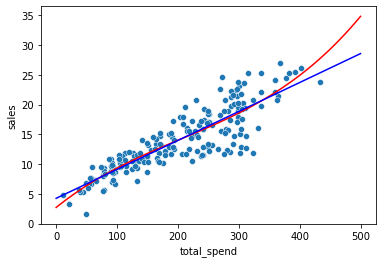

In [44]:
sns.scatterplot(x = "total_spend", y = "sales", data = df)
plt.plot(potential_spend, predicted_sales_poly, color = "red")
plt.show()

sns.scatterplot(x = "total_spend", y = "sales", data = df)
plt.plot(potential_spend, predicted_sales_poly, color = "red")
plt.plot(potential_spend, predicted_sales_lin, color = "blue")
plt.show()

In [45]:
spend = 420
sales_pred_lin = b1 * spend + b0
sales_pred_poly = a1 * spend ** 3 + a2 * spend ** 2 + a3 * spend + a0

In [46]:
print(sales_pred_lin, sales_pred_poly)

24.691937530036547 26.563929726371175
